## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "shinkaimakoto"
hashtag = "新海誠" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
tau = 855
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(855, '新海誠', 9208)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
新海誠,9207
すずめの戸締まり,7086
映画,3855
映画鑑賞,1384
君の名は,1357
...,...
大人になるまですずめはカラスの子供だと思ってた人と繋がりたい,1
空模様,1
今を大切に,1
iameiga_天気の子,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['コレド室町', '大人になるまですずめはカラスの子供だと思ってた人と繋がりたい', '今を大切に', 'iameiga_天気の子', '空模様']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
すずめの戸締まり,7085
映画,3854
映画鑑賞,1383
君の名は,1356
松村北斗,1192
...,...
雨天,1
うーんおいすずめはしないかな,1
4コマ漫画,1
新海映画の風景画が好き,1


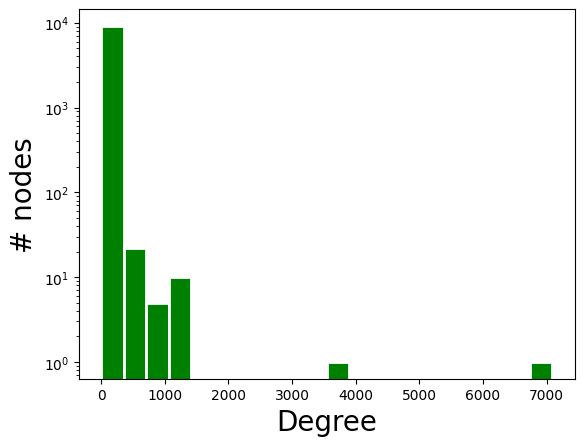

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.498324619797539, 
its standard error sigma: 0.0641223742229781, 
k_min: 55.0


(2.498324619797539, 0.0641223742229781, 55.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 0.00012193709971723559.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.20744597794246522.


C:\Users\yuki\Desktop\github\Instagram-Trend-Analysis\.venv\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.498324619797539, 
its standard error sigma: 0.0641223742229781, 
k_min: 55.0


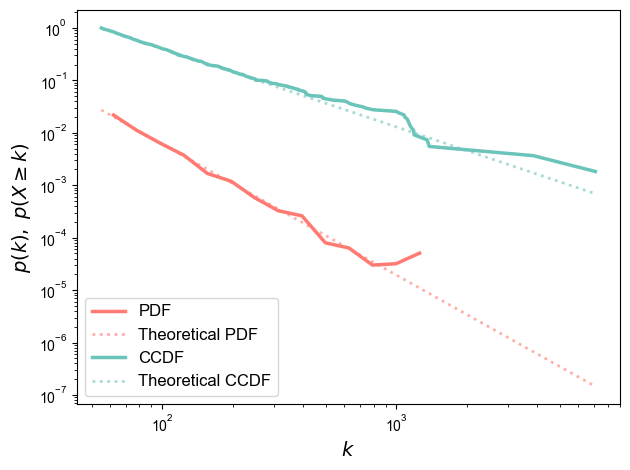

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.498324619797539, 
its standard error sigma: 0.0641223742229781, 
k_min: 55.0


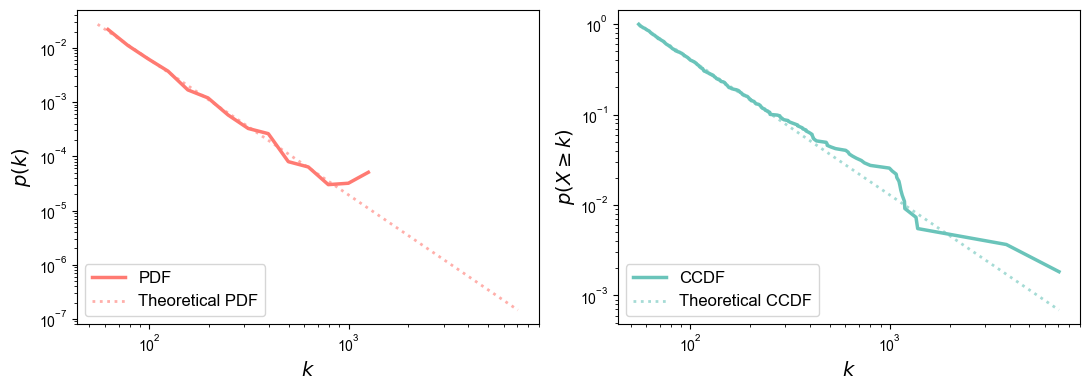

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')